# sparkly

![spark joy](https://media.giphy.com/media/WqKeNtyTujqTUXyqKz/giphy.gif)

Look... I have no imagination for titles, not after spending 18 hours on this, most of it going down deadends. 

* Pandas styler options? Nope
* Javascript workarounds messing with ```__repr__```: No, I have spent all of my life not learning Javascript, I will continue to do so
* Ipywidgets? Wow this seems finicky for what when I'm doing some preliminary analysis and am going to throw away 99% of what I work on 
* Maybe just having a single function that leverages Ipython's HTML? Oh, yes, maybe.

(This all avoids the fact that as much as I'd like to contribute to open source, 1) I suck at git and 2) I completely forgot until nearly the end that I probably have to ask permission from work for project work, even nonprofit work, first.)

## Getting Started

These instructions will get your sparkly sparkline thing going. Put the python file somewhere convenient. Then:

```
import sparkly
```

Yes, that's it. I will make it fancier in the future, but you'll have to catch me at a time when I have a better handle on python101 stuff like classes and modules...

## Dependencies

* matplotlib
* pandas
* numpy
* ipython

### Wait, how do I view a sparkline on my data?

```
sparkly.display(df)
```
Some of the optional flags available:
```
sparkly.display(df, order=None, max_rows=10, max_cols=999)
```
* dataframe for generating sparklines. Plots generated are based on order within the dataframe (meaning dataframe sorts will generate different sparklines if you do not specify some order), see below
* order: Series of same length as df for x-axis ordering, e.g., use df.index if you want the chart to be sorted by df.index values. Probably can accept more than a series, like a list and suchlike... so long as matplotlib will accept it for an x-axis, then sure, this will accept it too
* max_rows: max rows to display. Default is 10
* max_cols: max columns to display. Default is basically all because I'm assuming you wanna see the sparklines for all of it at once or something

## Examples

### 1. A straightforward df with no Multiindex columns or ind... indexes? Indices? Is this like the matplotlib axes thing?

,AssetClass,AssetClassSubType,Date,UMBSTradeCount,UMBSUniqueID,UMBS$Trades,FNMATradeCount,FNMAUniqueID,FNMA$Trades,FHLMCTradeCount,FHLMCUniqueID,FHLMC$Trades,GNMATradeCount,GNMAUniqueID,GNMA$Trades,OtherTradeCount,OtherUniqueID,Other$Trades
0,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 15Y,2019-08-01,1029.0,16.0,10367700.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-01,6773.0,24.0,186632371.9,0.0,0.0,0.0,5.0,4.0,102700.0,2015.0,35.0,41183055.9,0.0,0.0,0.0
2,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",OTHER,2019-08-01,0.0,0.0,0.0,17.0,10.0,372127.4,0.0,0.0,0.0,16.0,9.0,279696.4,0.0,0.0,0.0
3,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 15Y,2019-08-01,276.0,149.0,504236.2,43.0,30.0,394939.5,139.0,79.0,82820.6,25.0,13.0,12427.5,0.0,0.0,0.0
4,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-08-01,831.0,367.0,6911505.6,36.0,21.0,432535.6,377.0,157.0,673000.4,552.0,265.0,5600971.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-10-31,1032.0,527.0,10939302.7,44.0,30.0,317049.0,303.0,138.0,317691.0,627.0,334.0,3480925.4,0.0,0.0,0.0
581,AGENCY PASS-THRU (SPECIFIED),ADJUSTABLE/HYBRID,2019-10-31,0.0,0.0,0.0,32.0,12.0,16349.8,6.0,4.0,62976.8,6.0,4.0,6742.0,12.0,4.0,5176.3
582,AGENCY PASS-THRU (SPECIFIED),OTHER,2019-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,AGENCY CMO,P&I,2019-10-31,0.0,0.0,0.0,280.0,145.0,205136.0,297.0,152.0,194484.0,209.0,117.0,78706.8,18.0,11.0,34884.2

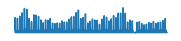
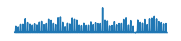
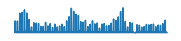
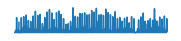
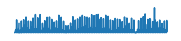
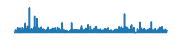
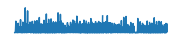
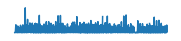
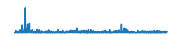
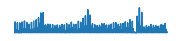
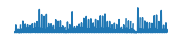
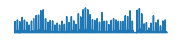
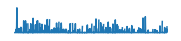
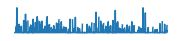
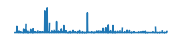

In [13]:
import pandas as pd
import numpy as np
import datetime
import sparkly
import random

df = pd.read_csv('samplefile.csv')
df.Date = pd.to_datetime(df.Date, format='%Y%m%d')
df.set_index(['AssetClass', 'AssetClassSubType', 'Date'], inplace=True)
df.replace('*', '', inplace=True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace=True)

sparkly.display(df)

### 2. A straightforward df, but with the frame already sorted in some predetermined way.

,AssetClass,AssetClassSubType,Date,UMBSTradeCount,UMBSUniqueID,UMBS$Trades,FNMATradeCount,FNMAUniqueID,FNMA$Trades,FHLMCTradeCount,FHLMCUniqueID,FHLMC$Trades,GNMATradeCount,GNMAUniqueID,GNMA$Trades,OtherTradeCount,OtherUniqueID,Other$Trades
584,AGENCY CMO,IO/PO,2019-10-31,0.0,0.0,0.0,29.0,17.0,303877.5,34.0,16.0,321216.4,39.0,21.0,336688.5,NaN,NaN,NaN
231,AGENCY PASS-THRU (SPECIFIED),OTHER,2019-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,AGENCY PASS-THRU (SPECIFIED),ADJUSTABLE/HYBRID,2019-09-06,0.0,0.0,0.0,9.0,6.0,84252.2,38.0,19.0,974.0,7.0,4.0,31394.5,10.0,8.0,18077.3
421,AGENCY CMO,P&I,2019-10-07,0.0,0.0,0.0,286.0,186.0,2906197.0,275.0,148.0,1453406.5,237.0,144.0,3565779.5,10.0,7.0,21417.8
422,AGENCY CMO,IO/PO,2019-10-07,0.0,0.0,0.0,38.0,25.0,136622.5,32.0,22.0,166409.6,32.0,21.0,234756.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-09-10,10244.0,29.0,275058506.3,0.0,0.0,0.0,46.0,10.0,398950.0,2132.0,27.0,70941549.4,0.0,0.0,0.0
46,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-08,10572.0,27.0,312674777.7,0.0,0.0,0.0,45.0,8.0,1344968.2,1901.0,31.0,39065516.8,0.0,0.0,0.0
37,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-07,10987.0,28.0,363701507.6,0.0,0.0,0.0,25.0,6.0,1283690.0,2194.0,32.0,46713012.0,0.0,0.0,0.0
415,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-10-07,11254.0,29.0,395799855.8,0.0,0.0,0.0,48.0,10.0,384107.0,1713.0,29.0,41745567.8,0.0,0.0,0.0

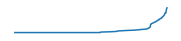
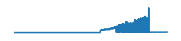
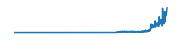
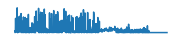
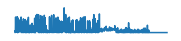
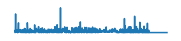
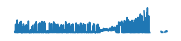
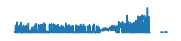
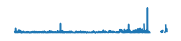
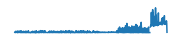
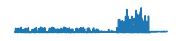
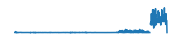
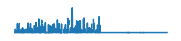
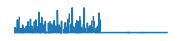
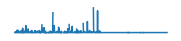

In [2]:
df2 = df.copy()
df2.sort_values(by='UMBSTradeCount', inplace=True)

sparkly.display(df2)

### 3. A df with a Multiindex on the ind... on the rows.


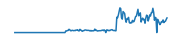
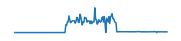
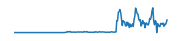
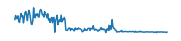
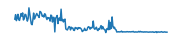
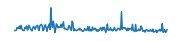
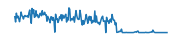
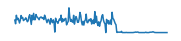
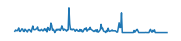
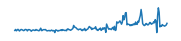
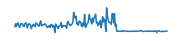
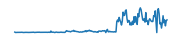
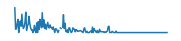
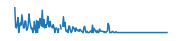
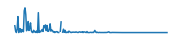

In [3]:
df3 = df.copy()
df3 = df2.groupby(['AssetClass', 'Date']).mean()

sparkly.display(df3)

### 4. A df with Multiindex columns.


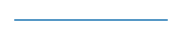
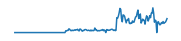
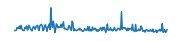

In [4]:
df4 = df.copy()
df4 = df4.groupby(['AssetClass', 'Date']).agg({
    'UMBSTradeCount': [min, max], 
    'FNMA$Trades': np.mean
})

sparkly.display(df4)

### 5. A df where we have some predetermined x-axis for ordering, rather than the order the data is already set within the dataframe.

It'll sort by however matplotlib does it.

In this case I generated a randomly ordered index for the axis, which creates kind of a crazy scribbly effect.

,AssetClass,AssetClassSubType,Date,UMBSTradeCount,UMBSUniqueID,UMBS$Trades,FNMATradeCount,FNMAUniqueID,FNMA$Trades,FHLMCTradeCount,FHLMCUniqueID,FHLMC$Trades,GNMATradeCount,GNMAUniqueID,GNMA$Trades,OtherTradeCount,OtherUniqueID,Other$Trades,counter
0,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 15Y,2019-08-01,1029.0,16.0,10367700.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1066134
1,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-01,6773.0,24.0,186632371.9,0.0,0.0,0.0,5.0,4.0,102700.0,2015.0,35.0,41183055.9,0.0,0.0,0.0,729687
2,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",OTHER,2019-08-01,0.0,0.0,0.0,17.0,10.0,372127.4,0.0,0.0,0.0,16.0,9.0,279696.4,0.0,0.0,0.0,1421125
3,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 15Y,2019-08-01,276.0,149.0,504236.2,43.0,30.0,394939.5,139.0,79.0,82820.6,25.0,13.0,12427.5,0.0,0.0,0.0,201284
4,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-08-01,831.0,367.0,6911505.6,36.0,21.0,432535.6,377.0,157.0,673000.4,552.0,265.0,5600971.4,0.0,0.0,0.0,110304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-10-31,1032.0,527.0,10939302.7,44.0,30.0,317049.0,303.0,138.0,317691.0,627.0,334.0,3480925.4,0.0,0.0,0.0,1446954
581,AGENCY PASS-THRU (SPECIFIED),ADJUSTABLE/HYBRID,2019-10-31,0.0,0.0,0.0,32.0,12.0,16349.8,6.0,4.0,62976.8,6.0,4.0,6742.0,12.0,4.0,5176.3,290589
582,AGENCY PASS-THRU (SPECIFIED),OTHER,2019-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1136652
583,AGENCY CMO,P&I,2019-10-31,0.0,0.0,0.0,280.0,145.0,205136.0,297.0,152.0,194484.0,209.0,117.0,78706.8,18.0,11.0,34884.2,1850092

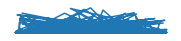
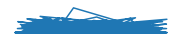
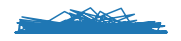
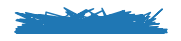
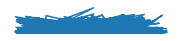
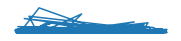
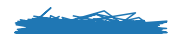
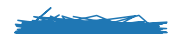
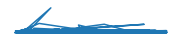
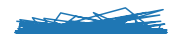
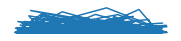
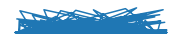
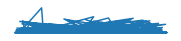
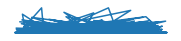
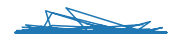
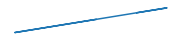

In [5]:
df5 = df.copy()
random_counter = [random.randint(1, 2000000) for i in df5.index]
df5['counter'] = random_counter

sparkly.display(df=df5, order=df5['counter'])

### 6. A df that truncates view if all you wanna do is see a head()-type summary.

,AssetClass,AssetClassSubType,Date,...,OtherTradeCount,OtherUniqueID,Other$Trades
0,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 15Y,2019-08-01,...,0.0,0.0,0.0
1,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-01,...,0.0,0.0,0.0
...,...,...,...,...,...,...,...
583,AGENCY CMO,P&I,2019-10-31,...,18.0,11.0,34884.2
584,AGENCY CMO,IO/PO,2019-10-31,...,NaN,NaN,NaN

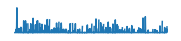
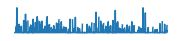
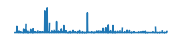

In [7]:
sparkly.display(df=df, max_rows=5, max_cols=6)

### 7. A display that shows off subsets of the dataset, with some date ordering and a truncated view.

,UMBSTradeCount,FNMATradeCount,FHLMCTradeCount
0,1029.0,0.0,0.0
1,6773.0,0.0,5.0
...,...,...,...
583,0.0,280.0,297.0
584,0.0,29.0,34.0

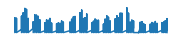
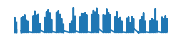
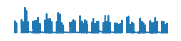

In [11]:
# this is for matplotlib's weird issues with datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sparkly.display(df=df[['UMBSTradeCount', 'FNMATradeCount', 'FHLMCTradeCount']], order=df['Date'], max_rows=5)

And that's all, folks! I think it's pretty cool for what was basically a few hours of work of actual coding and like hours and hours of furious spelunking through stackoverflow to patch together the concept I had in mind. 

### Next Steps

* Building better error handling... there's, like, none in this. What's this 'try, except' thing you speak of? Unit testing? Whazzat? 
* More testing. I think I covered a lot of edge cases but you can only test so much within a short time frame.
* Being able to use user defaults from pandas for max row, max column display as a starting default
* Being able to generate charts on row level... this might need some thought as the first data set I tried this on had a million rows and it was, btw, a Bad Idea
* I wish there was some way to keep styling and return a df and not an html but I am stumped as to how at the moment and not ready to override random ```__repl__``` methods just yet. 
* Getting extra credit for this??? I know it's not an ipywidget but it works?


# Author

* Sharon Sung, sungsh@umich.edu

Feel free to send me any comments, or not.